In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gp_methods import *

plt.style.use('seaborn-darkgrid')

# Colorblind-friendly colors
colors = [[0,0,0],  [86/255,180/255,233/255],  [213/255,94/255,0], [0,158/255,115/255], [230/255,159/255,0],
         [0,114/255,178/255], '#984ea3', '#999999', '#e41a1c', '#f781bf']
colors=colors*2
plt.rcParams['font.size']=18

# Univariate gaussians
Characterized by a scalar mean and scalar variance

What is the effect of changing the mean and variance?

(array([ 2.,  4., 25., 52., 56., 73., 49., 20., 11.,  8.]),
 array([-5.96509732, -4.82812247, -3.69114762, -2.55417278, -1.41719793,
        -0.28022308,  0.85675177,  1.99372662,  3.13070147,  4.26767632,
         5.40465117]),
 <a list of 10 Patch objects>)

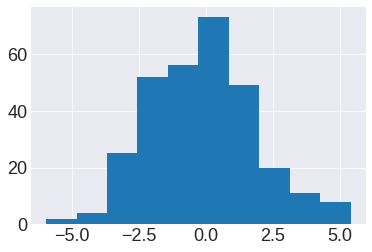

In [2]:
mean = 0
variance = 2
################################################################################################
plt.rcParams['figure.figsize'] = 6,4
sd = np.sqrt(variance)
draws = np.random.normal(mean, 2, size=300)
plt.hist(draws)

# Multivariate gaussians
Characterized by a mean vector and a covariance matrix

$$
\begin{bmatrix}
x_1 \\ 
x_2 \\ 
\end{bmatrix} \sim
N \Bigg(
\begin{bmatrix}
\mu_1 \\ 
\mu_2 \\ 
\end{bmatrix}, \ 
\begin{bmatrix}
var(x_1) & cov(x_1, x_2) \\ 
cov(x_1, x_2) & var(x_2) \\ 
\end{bmatrix}
\Bigg)
$$

Questions to answer:
1. What is the effect of changing $\mu_1$ and $\mu_2$?
2. What is the effect of changing $var(x_1)$ and $var(x_2)$?
3. What is the effect of changing $cov(x_1, x_2)$?

Note: you will get an invalid result if $|cov(x_1, x_2)| > \sqrt{var(x_1)var(x_2)}$

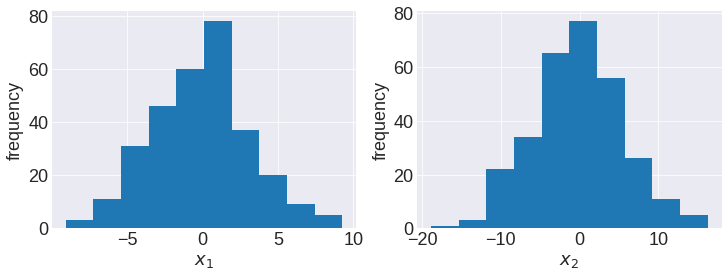

Text(0, 0.5, '$x_2$')

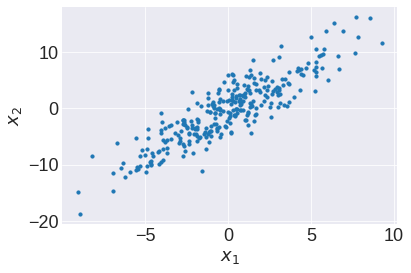

In [13]:
mu = [0, 0]
var_1 = 10
var_2 = 30
cov = 15

################################################################################################

cov_mat = [[var_1, cov],[cov, var_2]]
draws = np.random.multivariate_normal(mu, cov_mat, size=300)

plt.rcParams['figure.figsize'] = 12,4
plt.rcParams['font.size']=18
#Plotting marginal of x1 
plt.subplot(1,2,1)
plt.hist(draws[:,0])
plt.ylabel('frequency')
plt.xlabel('$x_1$')

#Plotting marginal of x2
plt.subplot(1,2,2)
plt.hist(draws[:,1])
plt.xlabel('$x_2$')
plt.ylabel('frequency')
plt.show()

plt.rcParams['figure.figsize'] = 6,4
plt.scatter(draws[:,0], draws[:,1], s=10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# A basic GP specification with a squared exponential kernel
A Gaussian process can be thought of as a distribution of functions, $p\bigg(f(t)\bigg)$. We do not get analytic expressions for these functions, but we can evaluate the drawn functions at any set of times. The distribution of function evaluations will be multivariate normal. This is the definition of a GP. The covariance between any two times is defined by a covariance function. The squared exponential function is a common choice for the covariance function:



$$
K(t_i, t_j) = \tau^2exp\bigg(-\frac{(t_i-t_j)^2}{2b^2}\bigg)
$$

Questions to answer

1. What is the effect of changing $\tau^2$?
2. What is the effect of changing the bandwidth, $b$?

Text(0, 0.5, 'y at 20 sec')

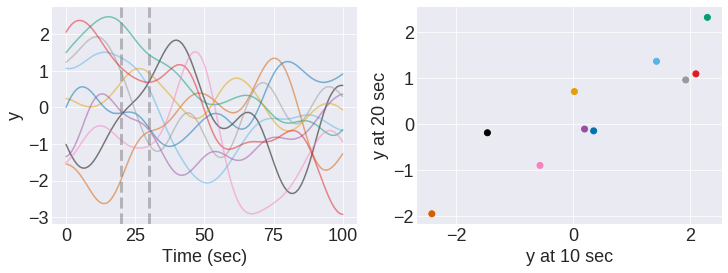

In [20]:
#Covariance function hyperparameters
b = 10
tau_sq = 1

################################################################################


#Vector of times at which we want to evaluate drawn functions
time_vec = np.linspace(0,100, 101)

#Function evaluations of GPs are multivariate normal with a mean vector and covariance matrix specification
mean_vec = np.zeros(len(time_vec))
cov_mat = squared_exponential(time_vec, b, tau_sq)

#Number of draws from GP in plot
num_draws=10

#Also keep track of function evaluations at 20 seconds and 30 seconds
vals_at_10 = np.zeros(num_draws)
vals_at_20 = np.zeros(num_draws)


plt.rcParams['figure.figsize'] = 12,4
plt.subplot(1,2,1)
for i in range(num_draws):
    gp_draw = np.random.multivariate_normal(mean_vec, cov_mat)
    vals_at_10[i] = gp_draw[10]
    vals_at_20[i] = gp_draw[20]
    
    plt.plot(time_vec, gp_draw, color=colors[i], alpha=0.5)
plt.axvline(20, color='gray', linestyle='--', linewidth=3, alpha=0.5)
plt.axvline(30, color='gray', linestyle='--', linewidth=3, alpha=0.5)
plt.xlabel('Time (sec)')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(vals_at_10, vals_at_20, color=colors[:num_draws])
plt.xlabel('y at 10 sec')
plt.ylabel('y at 20 sec')

# GPs for learning functions from data

Let say you want to characterize a function $f(x)$, but you only know its value at a few locations. In other words, you know $f(\boldsymbol{x}_{obs})$ for some vector of x values, $\boldsymbol{x}_{obs}$.


Using Bayes theorem, a GP prior can be updated in light of observed data. The result is a conditional distribution of functions, $p\bigg(f(x) | f(\boldsymbol{x}_{obs})\bigg)$ 

Note that every drawn function passes through the points in $f(\boldsymbol{x}_{obs})$.

Text(0.5, 1.0, 'Draws from GP posterior')

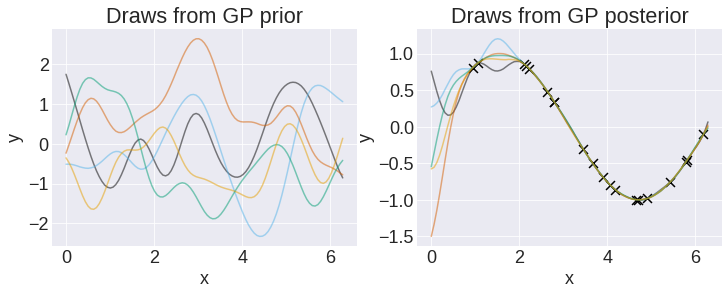

In [5]:
num_data_points = 20
x_values = np.random.uniform(0,2*np.pi,size=num_data_points)
y_values = np.sin(x_values)

#Number of draws from GP in plot
num_draws=5

#Covariance function hyperparameters
b = 0.5
tau_sq = 1

################################################################################

#Vector of times at which we want to plot
x_pred = np.linspace(0,2*np.pi, 101)

#Plotting the prior
mean_vec = np.zeros(len(x_pred))
cov_mat = squared_exponential(x_pred, b, tau_sq)

plt.rcParams['figure.figsize'] = 12,4
plt.subplot(1,2,1)
for i in range(num_draws):
    gp_draw = np.random.multivariate_normal(mean_vec, cov_mat)
    plt.plot(x_pred, gp_draw, color=colors[i], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Draws from GP prior')

#Getting posterior GP distribution
post_mean, post_cov = gp_predict(x_values, y_values, x_pred, 0, b, tau_sq, 10**-6)

#Plotting the posterior
mean_vec = np.zeros(len(x_values))
cov_mat = squared_exponential(x_values, b, tau_sq)

plt.subplot(1,2,2)
for i in range(num_draws):
    gp_draw = np.random.multivariate_normal(post_mean, post_cov)
    plt.plot(x_pred, gp_draw, color=colors[i], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_values,y_values, marker='x', s=80, color='k')
plt.title('Draws from GP posterior')


# GPs for emulators of transient simulations

This framework is very useful for building training sets for emulators of physical simulations when one of the simulation inputs is a transient ramp. For example, an input to FDS is a heat release rate ramp. The goal is to train neural networks to produce the FDS output for any conceivable HRR ramp for a given geometry (like the burn structure). However, we must build a training set that allows the NNs to learn how to do this. 

GPs are useful because they randomly generated ramps that are reasonably smooth and (mostly) resemble HRR ramps that someone would want to simulate in FDS. That said, not every GP draw in the training set needs to look like a use case. **The most important part is that the neural networks learn how to emulate FDS for any meaningful use case, not that every GP draw resembles a meaningful use case.**

Also, HRR ramps for burn structure experiments should start at zero (at the beginning of the experiment) and end at zero (at the end of the experiment). Using the framework described above, we can impose these constraints into the GP draws. 

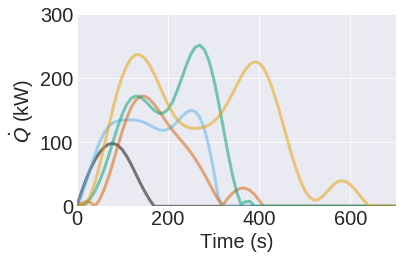

In [6]:
plt.rcParams.update({'font.size': 20})
n_draws = 5
n_points = 91
gp_mean = 150
tau_sq = 8100

#Randomly draw an experimental duration. Not all burn structure tests are the same length, so we don't want the HRR going
#to zero at the same time for every case in the training set. 
max_duration = 900
min_duration = 150

##############################################################################################################################
time_vec = np.linspace(0,max_duration,n_points)
delta_t = time_vec[1]-time_vec[0]

np.random.seed(2)
duration = np.random.uniform(min_duration,max_duration-delta_t-0.0001)
plt.rcParams['figure.figsize'] = 6,4
for i in range(n_draws):
    #Drawing a duration
    duration = np.random.uniform(min_duration,max_duration-delta_t-0.0001)
    
    #The code is set up so that the GP mean is always a vector of zeros. The workaround is to make 
    #the points corresponding to zero HRR actually -gp_mean, and then shifting the function up by gp_mean
    y_pred, cov = gp_predict([0,duration], [-gp_mean,-gp_mean], time_vec, 0.0, 60, tau_sq, 10**-3)
    hrr_mvn = multivariate_normal(y_pred, cov)
    frac_ramp = np.abs(hrr_mvn.rvs()+gp_mean)
    
    #Don't make the fire ramp up after the experiment is over
    frac_ramp[time_vec>duration] = 0
    
    #Plotting
    plt.plot(time_vec, frac_ramp, alpha=0.5, color=colors[i], linewidth=3)
    plt.xlim(0,700)
    plt.ylim(0,300)
    plt.xlabel('Time (s)')
    plt.ylabel('$\dot{Q}$ (kW)')
    plt.tight_layout()
plt.show()

# GPs can learn functions from noisy observations too


Let say you have noisy observations of a function, but you don't know what the function is.


$$
y_i = f(x_i) + N(0, \sigma)
$$

Note that this is very similar to the linear regression framework, where

$$
f(x) = \beta_0 + \beta_1 x
$$

Gaussian processes offer a more flexible regression framework because we do not specify a functional form. From the observations, we obtain a posterior distribution for $f(x)$.

Different bandwidth choices in the prior give different levels of "smoothness" in the posterior. Consequentially, GP regression can be viewed as a probabalistic smoothing technique. 

Text(0.5, 1.0, 'Draws from GP posterior')

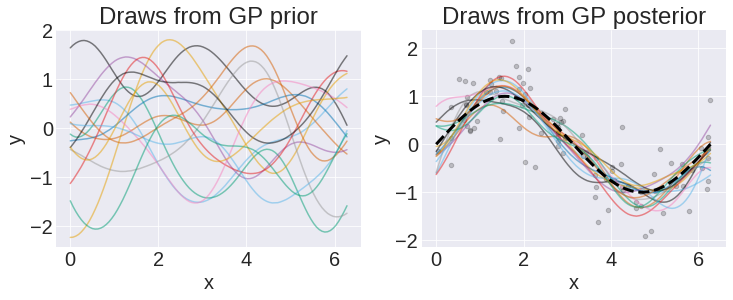

In [7]:
num_data_points = 100
sigma = .5 #For random noise

x_values = np.random.uniform(0,2*np.pi,size=num_data_points)
y_values = np.sin(x_values) + np.random.normal(0,sigma,size=num_data_points)

#Number of draws from GP in plot
num_draws=15

#Covariance function hyperparameters
b = 1
tau = 1

################################################################################

#Vector of times at which we want to plot
x_pred = np.linspace(0,2*np.pi, 101)

#Plotting the prior
mean_vec = np.zeros(len(x_pred))
cov_mat = squared_exponential(x_pred, b, tau)

plt.rcParams['figure.figsize'] = 12,4
plt.subplot(1,2,1)
for i in range(num_draws):
    gp_draw = np.random.multivariate_normal(mean_vec, cov_mat)
    plt.plot(x_pred, gp_draw, color=colors[i], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Draws from GP prior')

#Getting posterior GP distribution
post_mean, post_cov = gp_predict(x_values, y_values, x_pred, sigma, b, tau, tau_sq2=10**-6)

#Plotting the posterior
mean_vec = np.zeros(len(x_values))
cov_mat = squared_exponential(x_values, b, tau)

plt.subplot(1,2,2)
for i in range(num_draws):
    gp_draw = np.random.multivariate_normal(post_mean, post_cov)
    plt.plot(x_pred, gp_draw, color=colors[i], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_values,y_values, marker='o', s=20, color='k', alpha=0.2)
plt.plot(x_pred, np.sin(x_pred), linestyle='--', linewidth=3, color='k')
plt.title('Draws from GP posterior')

